In [1460]:
%matplotlib inline 
%reset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from random import randint
from math import sqrt

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1461]:
df = pd.read_csv('Data/mall_customers.csv')

In [1462]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [1463]:
df.shape
# df = df.sample(frac=1)

(200, 5)

In [1464]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [1465]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [1466]:
x = df['Age'].to_numpy()
y = df['Annual Income (k$)'].to_numpy()

print(type(x), type(y))
print(len(x))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
200


In [1467]:
# Set maximum number of iterations and number of clusters 
max_iter = 1
k = 4

In [1468]:
# Choose random centers to start...
k_x, k_y = [], []

for i in range(k):
    k_x.append(randint(20,60)*1)
    k_y.append(randint(40,100)*1)

print('Centroid clusters:')
for j in range(k):
    print(k_x[j], k_y[j])

Centroid clusters:
57 63
35 89
32 71
23 55


In [1469]:
# Make an empty numpy array of size k x len(x) to store distances to centroids
# Build in extra row for the minimum distance value
d = np.zeros([k + 1, len(x)])
d.shape

(5, 200)

In [1470]:
def find_distance(x, y, k_x, k_y):
    '''Finds distances from each point to each center.
    x,y are data, k_x, k_y are center coordinates'''
    distance = sqrt((x - k_x)**2 + (y - k_y)**2)
    return distance

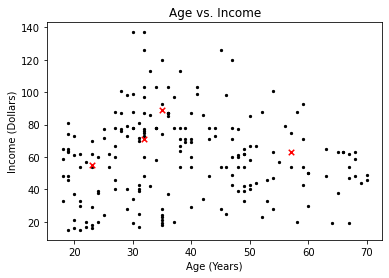

In [1471]:
# Visualize data 
plt.scatter(x, y, s = 5, color='black')
plt.scatter(k_x, k_y, s = 30, color='red', marker='x')
plt.title('Age vs. Income')
plt.xlabel('Age (Years)')
plt.ylabel('Income (Dollars)')
plt.show()

In [1472]:
# Iteratively find the distance between every point and every center. 
# Construct array d containing distances from every point to every centroid
# Rows (except last) = distances from data points to each centroid k_n
# Last Row of d = min(column), ie distances of data points to closes centroid
# Col of d = distance from datapoint m to each centroid k_n, min is last row

clusters = {}

for iteration in range(0, max_iter): #number iterations
    for j in range(len(x)): #200
        min_distance = 9999999999
        x_i, y_i = x[j], y[j] # Choose the x, y coords of the data point in question
        for i in range(0, k): #k = number of clusters, 4
            k_xi, k_yi = k_x[i], k_y[i] # Coordinates of the centroids 
            distance = find_distance(x_i, y_i, k_xi, k_yi)
            if distance < min_distance:
                min_distance = distance 
                centroid_coords = k_xi, k_yi
            d[i,j] = distance
        
        try: 
            clusters[centroid_coords].append(tuple([x_i, y_i]))
        except KeyError:
            clusters[centroid_coords] = [tuple([x_i, y_i])]
        
        # Dict of data points belonging to which centroid
        print("Datapoint:",j,", x:",x_i,", y:",y_i,", Minimum distance:",min_distance, ", Nearest_centroid:", centroid_coords)
        
        col = d[:k,j]
        alt_min_distance = np.amin(col)
        d[k,j] = alt_min_distance


Datapoint: 0 , x: 19 , y: 15 , Minimum distance: 40.19950248448356 , Nearest_centroid: (23, 55)
Datapoint: 1 , x: 21 , y: 15 , Minimum distance: 40.049968789001575 , Nearest_centroid: (23, 55)
Datapoint: 2 , x: 20 , y: 16 , Minimum distance: 39.11521443121589 , Nearest_centroid: (23, 55)
Datapoint: 3 , x: 23 , y: 16 , Minimum distance: 39.0 , Nearest_centroid: (23, 55)
Datapoint: 4 , x: 31 , y: 17 , Minimum distance: 38.8329756778952 , Nearest_centroid: (23, 55)
Datapoint: 5 , x: 22 , y: 17 , Minimum distance: 38.01315561749642 , Nearest_centroid: (23, 55)
Datapoint: 6 , x: 35 , y: 18 , Minimum distance: 38.897300677553446 , Nearest_centroid: (23, 55)
Datapoint: 7 , x: 23 , y: 18 , Minimum distance: 37.0 , Nearest_centroid: (23, 55)
Datapoint: 8 , x: 64 , y: 19 , Minimum distance: 44.553338819890925 , Nearest_centroid: (57, 63)
Datapoint: 9 , x: 30 , y: 19 , Minimum distance: 36.6742416417845 , Nearest_centroid: (23, 55)
Datapoint: 10 , x: 67 , y: 19 , Minimum distance: 45.122056690713

Datapoint: 157 , x: 30 , y: 78 , Minimum distance: 7.280109889280518 , Nearest_centroid: (32, 71)
Datapoint: 158 , x: 34 , y: 78 , Minimum distance: 7.280109889280518 , Nearest_centroid: (32, 71)
Datapoint: 159 , x: 30 , y: 78 , Minimum distance: 7.280109889280518 , Nearest_centroid: (32, 71)
Datapoint: 160 , x: 56 , y: 79 , Minimum distance: 16.0312195418814 , Nearest_centroid: (57, 63)
Datapoint: 161 , x: 29 , y: 79 , Minimum distance: 8.54400374531753 , Nearest_centroid: (32, 71)
Datapoint: 162 , x: 19 , y: 81 , Minimum distance: 16.401219466856727 , Nearest_centroid: (32, 71)
Datapoint: 163 , x: 31 , y: 81 , Minimum distance: 8.94427190999916 , Nearest_centroid: (35, 89)
Datapoint: 164 , x: 50 , y: 85 , Minimum distance: 15.524174696260024 , Nearest_centroid: (35, 89)
Datapoint: 165 , x: 36 , y: 85 , Minimum distance: 4.123105625617661 , Nearest_centroid: (35, 89)
Datapoint: 166 , x: 42 , y: 86 , Minimum distance: 7.615773105863909 , Nearest_centroid: (35, 89)
Datapoint: 167 , x: 3

In [1473]:
print("Number of entries in clusters dict:",len(clusters), "; Keys:",clusters.keys())
print("Centroid coords:")
for i in range(k):
    print(k_x[i], k_y[i])

Number of entries in clusters dict: 4 ; Keys: dict_keys([(23, 55), (57, 63), (32, 71), (35, 89)])
Centroid coords:
57 63
35 89
32 71
23 55


In [1474]:
def mean(lst):

    return sum(lst)/len(lst)

In [1475]:
centers = []
for i in range(k):
    m_x = 0
    m_y = 0
    items = 0
    for coord in clusters[k_x[i], k_y[i]]:
        items +=1 
        m_x += coord[0]
        m_y += coord[1]
    m_x = m_x/items
    m_y = m_y/items
    centers.append((m_x,m_y))

print(centers)

[(55.932203389830505, 51.16949152542373), (37.89473684210526, 98.8157894736842), (32.97435897435897, 73.84615384615384), (27.25, 38.40625)]


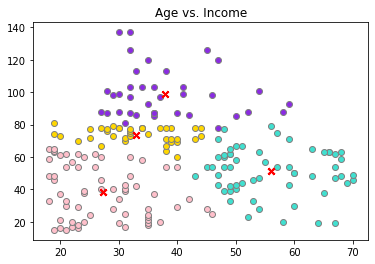

In [1476]:
# Visualize data 
colors = ['turquoise', 'blueviolet', 'gold', 'pink']

i = 0
for i in range(k):
    for coord in clusters[k_x[i], k_y[i]]:
        plt.scatter(coord[0], coord[1], color=colors[i], edgecolor='grey')
        plt.scatter(centers[i][0], centers[i][1], color = 'red', marker='x')
    
# plt.scatter(k_x, k_y, s = 30, color='red', marker='x')
plt.title('Age vs. Income')
plt.show()

In [1477]:
print(k_x)
print(clusters)

# avg_x = sum(k_x[0])/len(k_x[0])
# avg_y = sum(k_y[0])/len(k_y[0])
# print('Mean_x:', avg_x, 'Mean_y:',avg_y)

[57, 35, 32, 23]
{(23, 55): [(19, 15), (21, 15), (20, 16), (23, 16), (31, 17), (22, 17), (35, 18), (23, 18), (30, 19), (35, 19), (24, 20), (37, 20), (22, 20), (35, 21), (20, 21), (35, 23), (35, 24), (25, 24), (46, 25), (31, 25), (29, 28), (45, 28), (35, 28), (40, 29), (23, 29), (21, 30), (18, 33), (21, 33), (42, 34), (30, 34), (36, 37), (20, 37), (24, 38), (31, 39), (24, 39), (27, 40), (29, 40), (31, 40), (33, 42), (31, 43), (27, 46), (19, 46), (18, 48), (19, 48), (32, 48), (26, 54), (40, 54), (23, 54), (38, 54), (21, 54), (22, 57), (34, 58), (18, 59), (32, 60), (24, 60), (27, 60), (20, 61), (23, 62), (26, 62), (21, 62), (19, 63), (19, 64), (18, 65), (19, 65)], (57, 63): [(64, 19), (67, 19), (58, 20), (52, 23), (54, 28), (60, 30), (53, 33), (49, 33), (65, 38), (48, 39), (49, 39), (50, 40), (49, 42), (59, 43), (50, 43), (47, 43), (51, 44), (69, 44), (53, 46), (70, 46), (67, 47), (54, 47), (63, 48), (43, 48), (68, 48), (70, 49), (47, 49), (60, 50), (60, 50), (59, 54), (45, 54), (49, 54),